<a href="https://colab.research.google.com/github/rinazbelhaj/EVA/blob/master/Project%204/1)%20Assignment%204%20-%20First.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First attempt on MNIST

## Main Objective :
Achieve 99.4% accuracy on MNIST data with less than 15K parameters

## Current Objective :

This is the first attempt to acheive 99.4% accuracy on MNIST data using a plain vanilla network. The main objective in this code is to find a CNN architecture which is able to learn and reach the target of 99.4% without using any advanced concepts

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


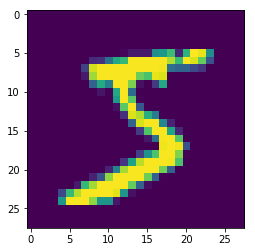

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1), name='conv_1')) # 26
model.add(Conv2D(64, (3, 3), activation='relu', name='conv_2')) # 24
model.add(Conv2D(128, (3, 3), activation='relu', name='conv_3')) # 22

model.add(MaxPooling2D(pool_size=(2, 2), name='pool_1')) # 11

model.add(Conv2D(32, (3, 3), activation='relu', name='conv_4')) # 9
model.add(Conv2D(64, (3, 3), activation='relu', name='conv_5')) # 7
model.add(Conv2D(128, (3, 3), activation='relu', name='conv_6')) # 5

model.add(Conv2D(10, (3, 3), activation='relu', name='conv_7')) #3
model.add(Conv2D(10, (3, 3), name='conv_8')) # 1
model.add(Flatten(name='flatten'))
model.add(Activation('softmax', name='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 64)        18496     
_________________________________________________________________
conv_3 (Conv2D)              (None, 22, 22, 128)       73856     
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 11, 11, 128)       0         
_________________________________________________________________
conv_4 (Conv2D)              (None, 9, 9, 32)          36896     
_________________________________________________________________
conv_5 (Conv2D)              (None, 7, 7, 64)          18496     
_________________________________________________________________
conv

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test, Y_test), verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 324us/step - loss: 0.1734 - acc: 0.9466 - val_loss: 0.0464 - val_acc: 0.9858
Epoch 2/10
60000/60000 [==============================] - 14s 240us/step - loss: 0.0588 - acc: 0.9824 - val_loss: 0.0503 - val_acc: 0.9839
Epoch 3/10
60000/60000 [==============================] - 14s 240us/step - loss: 0.0449 - acc: 0.9863 - val_loss: 0.0364 - val_acc: 0.9882
Epoch 4/10
60000/60000 [==============================] - 15s 250us/step - loss: 0.0349 - acc: 0.9899 - val_loss: 0.0431 - val_acc: 0.9872
Epoch 5/10
60000/60000 [==============================] - 15s 243us/step - loss: 0.0302 - acc: 0.9908 - val_loss: 0.0351 - val_acc: 0.9888
Epoch 6/10
60000/60000 [==============================] - 14s 239us/step - loss: 0.0246 - acc: 0.9924 - val_loss: 0.0354 - val_acc: 0.9897
Epoch 7/10
60000/60000 [==============================] - 14s 238us/

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.05264274920938697, 0.986]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[8.3102325e-09 6.5084882e-06 2.5472882e-06 5.3719714e-07 3.7290617e-06
  1.5991743e-08 4.4764607e-14 9.9997854e-01 4.4753006e-06 3.6420665e-06]
 [9.8146456e-12 6.7552477e-08 9.9999583e-01 3.9539091e-06 6.7805678e-10
  1.4679741e-09 2.2683235e-09 2.2073459e-09 1.0968364e-07 3.8820765e-12]
 [2.1820422e-10 9.9999869e-01 7.6579254e-10 8.0134534e-08 1.4923824e-08
  1.0654139e-06 2.7002467e-09 4.9260343e-08 1.1061782e-07 1.9410465e-12]
 [9.9999940e-01 6.9494459e-13 2.7311562e-09 5.7639071e-10 1.1906764e-08
  2.2712086e-07 1.6323074e-07 6.4712000e-09 1.2984015e-07 1.6130859e-07]
 [8.3541831e-09 1.1616928e-07 2.3638433e-08 1.8128042e-13 9.9999857e-01
  1.6070745e-11 9.1868235e-11 1.9168940e-07 2.1409123e-09 1.0810074e-06]
 [3.2189095e-11 1.0000000e+00 2.0981443e-10 9.2697308e-09 3.1695706e-09
  3.2073115e-09 4.8354563e-11 3.7837761e-08 5.3097633e-09 8.2692994e-13]
 [4.8844406e-10 1.7165365e-07 2.2694755e-06 5.9561842e-11 9.6957749e-01
  6.9028601e-09 3.6155034e-11 6.6906869e-05 3.0350998e-02 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

Number of Filters :  64


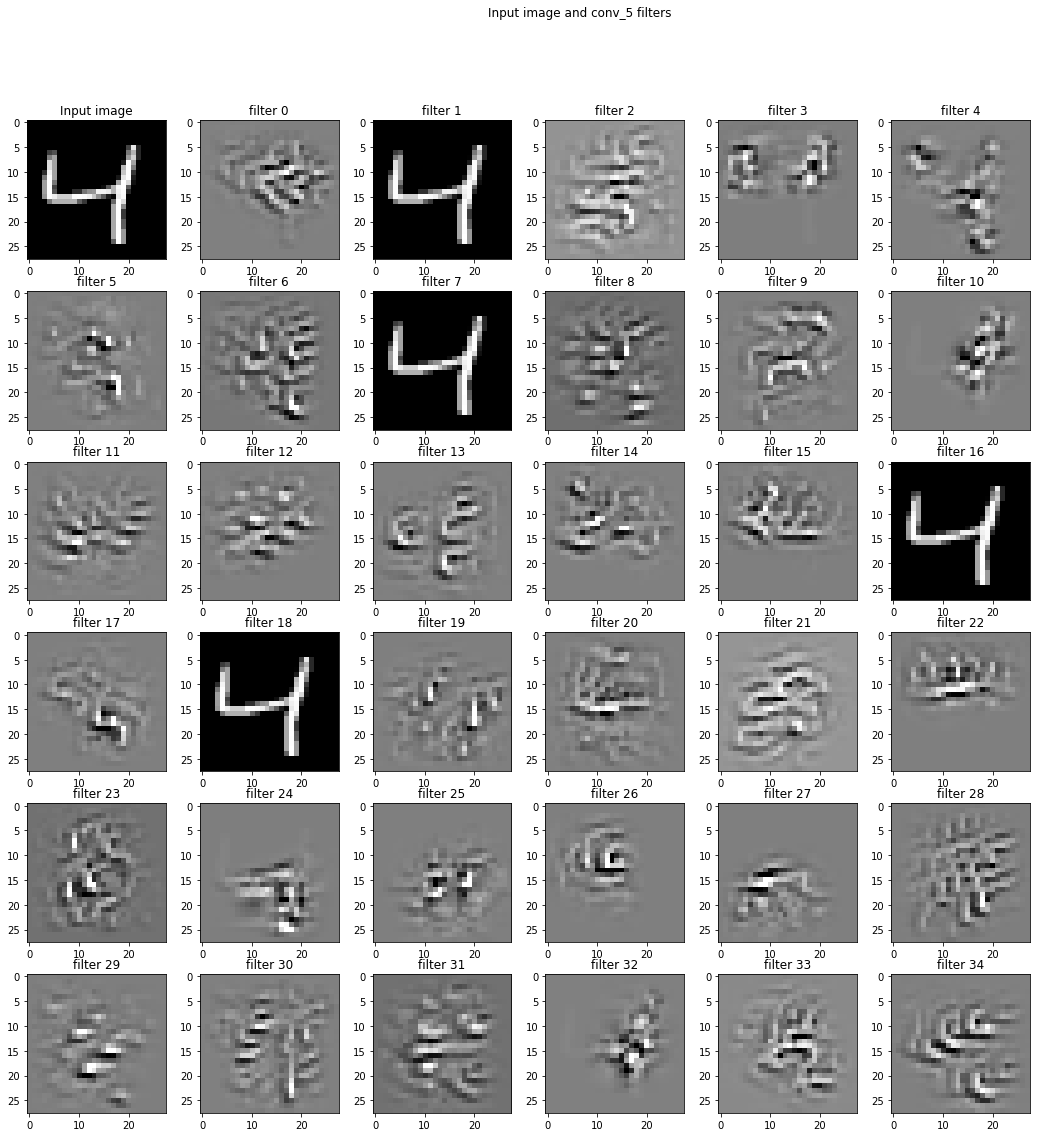

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv_5'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    print("Number of Filters : ",layer_output.shape[3])
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 8
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (16, 16))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.0, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

# Observations :

1. The model is able to learning. We were able to reach 99.21% validation accuracy with this initial model in 10 epochs. This means our architecture is working fine.

2. The model is also slightly overfitting. We need to fix that in the next iteration.

3. The number of parameters are too high considering that we need to meet the objective of 99.4% accuracy in 15 K parameters.